In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder \
   .master("local") \
   .appName("Neural Network Model") \
   .config("spark.executor.memory", "6gb") \
   .getOrCreate()
   
sc = spark.sparkContext

In [3]:
df = spark.createDataFrame([('Male', 67, 150), # insert column values
                            ('Female', 65, 135),
                            ('Female', 68, 130),
                            ('Male', 70, 160),
                            ('Female', 70, 130),
                            ('Male', 69, 174),
                            ('Female', 65, 126),
                            ('Male', 74, 188),
                            ('Female', 60, 110),
                            ('Female', 63, 125),
                            ('Male', 70, 173),
                            ('Male', 70, 145),
                            ('Male', 68, 175),
                            ('Female', 65, 123),
                            ('Male', 71, 145),
                            ('Male', 74, 160),
                            ('Female', 64, 135),
                            ('Male', 71, 175),
                            ('Male', 67, 145),
                            ('Female', 67, 130),
                            ('Male', 70, 162),
                            ('Female', 64, 107),
                            ('Male', 70, 175),
                            ('Female', 64, 130),
                            ('Male', 66, 163),
                            ('Female', 63, 137),
                            ('Male', 65, 165),
                            ('Female', 65, 130),
                            ('Female', 64, 109)], 
                           ['gender', 'height','weight']) # insert header values



In [4]:
df.show(5)

+------+------+------+
|gender|height|weight|
+------+------+------+
|  Male|    67|   150|
|Female|    65|   135|
|Female|    68|   130|
|  Male|    70|   160|
|Female|    70|   130|
+------+------+------+
only showing top 5 rows



In [5]:
from pyspark.sql import functions 

In [6]:
df = df.withColumn('gender',functions.when(df['gender']=='Female',0).otherwise(1))

In [7]:
df = df.select('height', 'weight', 'gender')

In [8]:
df.show()

+------+------+------+
|height|weight|gender|
+------+------+------+
|    67|   150|     1|
|    65|   135|     0|
|    68|   130|     0|
|    70|   160|     1|
|    70|   130|     0|
|    69|   174|     1|
|    65|   126|     0|
|    74|   188|     1|
|    60|   110|     0|
|    63|   125|     0|
|    70|   173|     1|
|    70|   145|     1|
|    68|   175|     1|
|    65|   123|     0|
|    71|   145|     1|
|    74|   160|     1|
|    64|   135|     0|
|    71|   175|     1|
|    67|   145|     1|
|    67|   130|     0|
+------+------+------+
only showing top 20 rows



In [9]:
import numpy as np

In [10]:
df.select("height", "weight", "gender").collect()

[Row(height=67, weight=150, gender=1),
 Row(height=65, weight=135, gender=0),
 Row(height=68, weight=130, gender=0),
 Row(height=70, weight=160, gender=1),
 Row(height=70, weight=130, gender=0),
 Row(height=69, weight=174, gender=1),
 Row(height=65, weight=126, gender=0),
 Row(height=74, weight=188, gender=1),
 Row(height=60, weight=110, gender=0),
 Row(height=63, weight=125, gender=0),
 Row(height=70, weight=173, gender=1),
 Row(height=70, weight=145, gender=1),
 Row(height=68, weight=175, gender=1),
 Row(height=65, weight=123, gender=0),
 Row(height=71, weight=145, gender=1),
 Row(height=74, weight=160, gender=1),
 Row(height=64, weight=135, gender=0),
 Row(height=71, weight=175, gender=1),
 Row(height=67, weight=145, gender=1),
 Row(height=67, weight=130, gender=0),
 Row(height=70, weight=162, gender=1),
 Row(height=64, weight=107, gender=0),
 Row(height=70, weight=175, gender=1),
 Row(height=64, weight=130, gender=0),
 Row(height=66, weight=163, gender=1),
 Row(height=63, weight=13

In [11]:
data_array =  np.array(df.select("height", "weight", "gender").collect())
data_array #view the array

array([[ 67, 150,   1],
       [ 65, 135,   0],
       [ 68, 130,   0],
       [ 70, 160,   1],
       [ 70, 130,   0],
       [ 69, 174,   1],
       [ 65, 126,   0],
       [ 74, 188,   1],
       [ 60, 110,   0],
       [ 63, 125,   0],
       [ 70, 173,   1],
       [ 70, 145,   1],
       [ 68, 175,   1],
       [ 65, 123,   0],
       [ 71, 145,   1],
       [ 74, 160,   1],
       [ 64, 135,   0],
       [ 71, 175,   1],
       [ 67, 145,   1],
       [ 67, 130,   0],
       [ 70, 162,   1],
       [ 64, 107,   0],
       [ 70, 175,   1],
       [ 64, 130,   0],
       [ 66, 163,   1],
       [ 63, 137,   0],
       [ 65, 165,   1],
       [ 65, 130,   0],
       [ 64, 109,   0]])

In [12]:
data_array.shape

(29, 3)

In [13]:
data_array[0]

array([ 67, 150,   1])

In [14]:
data_array[28]

array([ 64, 109,   0])

In [15]:
print(data_array.max(axis=0))
print(data_array.min(axis=0))

[ 74 188   1]
[ 60 107   0]


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
min_x = data_array.min(axis=0)[0]-10
max_x = data_array.max(axis=0)[0]+10
min_y = data_array.min(axis=0)[1]-10
max_y = data_array.max(axis=0)[1]+10

print(min_x, max_x, min_y, max_y)

50 84 97 198


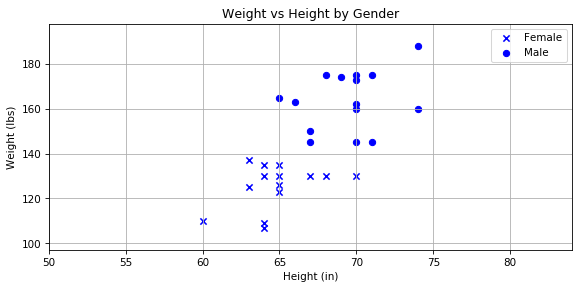

In [18]:
# formatting the plot grid, scales, and figure size
plt.figure(figsize=(9, 4), dpi= 75)
plt.axis([min_x,max_x,min_y,max_y])
plt.grid()
for i in range(len(data_array)):
    value = data_array[i]
    # assign labels values to specific matrix elements
    gender = value[2]
    height = value[0]
    weight = value[1]
    
    # filter data points by gender
    a = plt.scatter(height[gender==0],weight[gender==0], marker = 'x', c= 'b', label = 'Female')
    b = plt.scatter(height[gender==1],weight[gender==1], marker = 'o', c= 'b', label = 'Male')
    
    # plot values, title, legend, x and y axis
    plt.title('Weight vs Height by Gender')
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend(handles=[a,b])
    

In [19]:
np.random.seed(12345)

In [20]:
w1 = np.random.randn()
w2 = np.random.randn()
b= np.random.randn()

In [21]:
print(w1, w2, b)

-0.20470765948471295 0.47894333805754824 -0.5194387150567381


In [22]:
X = data_array[:,:2]
y = data_array[:,2]
print(X,y)

[[ 67 150]
 [ 65 135]
 [ 68 130]
 [ 70 160]
 [ 70 130]
 [ 69 174]
 [ 65 126]
 [ 74 188]
 [ 60 110]
 [ 63 125]
 [ 70 173]
 [ 70 145]
 [ 68 175]
 [ 65 123]
 [ 71 145]
 [ 74 160]
 [ 64 135]
 [ 71 175]
 [ 67 145]
 [ 67 130]
 [ 70 162]
 [ 64 107]
 [ 70 175]
 [ 64 130]
 [ 66 163]
 [ 63 137]
 [ 65 165]
 [ 65 130]
 [ 64 109]] [1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0]


In [23]:
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)
print(x_mean, x_std)

[ 67.20689655 145.24137931] [ 3.35671545 22.1743175 ]


In [24]:
def normalize(X):
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

In [25]:
X = normalize(X)
print(X)

[[-0.06163661  0.21460055]
 [-0.65745714 -0.4618577 ]
 [ 0.23627366 -0.68734378]
 [ 0.8320942   0.66557271]
 [ 0.8320942  -0.68734378]
 [ 0.53418393  1.29693375]
 [-0.65745714 -0.86773265]
 [ 2.02373527  1.92829478]
 [-2.14700848 -1.58928812]
 [-1.25327768 -0.91282987]
 [ 0.8320942   1.25183653]
 [ 0.8320942  -0.01088554]
 [ 0.23627366  1.34203096]
 [-0.65745714 -1.0030243 ]
 [ 1.13000446 -0.01088554]
 [ 2.02373527  0.66557271]
 [-0.95536741 -0.4618577 ]
 [ 1.13000446  1.34203096]
 [-0.06163661 -0.01088554]
 [-0.06163661 -0.68734378]
 [ 0.8320942   0.75576715]
 [-0.95536741 -1.72457977]
 [ 0.8320942   1.34203096]
 [-0.95536741 -0.68734378]
 [-0.35954687  0.80086436]
 [-1.25327768 -0.37166327]
 [-0.65745714  0.8910588 ]
 [-0.65745714 -0.68734378]
 [-0.95536741 -1.63438533]]


In [26]:
print('standard deviation')
print(round(X[:,0].std(axis=0),0))
print('mean')
print(round(X[:,0].mean(axis=0),0))

standard deviation
1.0
mean
-0.0


In [27]:
data_array = np.column_stack((X[:,0], X[:,1],y))
print(data_array)

[[-0.06163661  0.21460055  1.        ]
 [-0.65745714 -0.4618577   0.        ]
 [ 0.23627366 -0.68734378  0.        ]
 [ 0.8320942   0.66557271  1.        ]
 [ 0.8320942  -0.68734378  0.        ]
 [ 0.53418393  1.29693375  1.        ]
 [-0.65745714 -0.86773265  0.        ]
 [ 2.02373527  1.92829478  1.        ]
 [-2.14700848 -1.58928812  0.        ]
 [-1.25327768 -0.91282987  0.        ]
 [ 0.8320942   1.25183653  1.        ]
 [ 0.8320942  -0.01088554  1.        ]
 [ 0.23627366  1.34203096  1.        ]
 [-0.65745714 -1.0030243   0.        ]
 [ 1.13000446 -0.01088554  1.        ]
 [ 2.02373527  0.66557271  1.        ]
 [-0.95536741 -0.4618577   0.        ]
 [ 1.13000446  1.34203096  1.        ]
 [-0.06163661 -0.01088554  1.        ]
 [-0.06163661 -0.68734378  0.        ]
 [ 0.8320942   0.75576715  1.        ]
 [-0.95536741 -1.72457977  0.        ]
 [ 0.8320942   1.34203096  1.        ]
 [-0.95536741 -0.68734378  0.        ]
 [-0.35954687  0.80086436  1.        ]
 [-1.25327768 -0.37166327

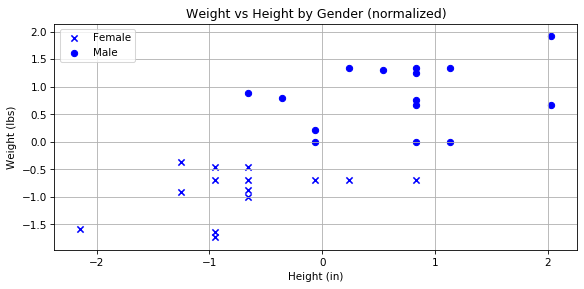

In [28]:
# formatting the plot grid, scales, and figure size
plt.figure(figsize=(9, 4), dpi= 75)
# plt.axis([min_x,max_x,min_y,max_y])
plt.grid()
for i in range(len(data_array)):
    value_n = data_array[i]
    # assign labels values to specific matrix elements
    gender_n = value_n[2]
    height_n = value_n[0]
    weight_n = value_n[1]
    an = plt.scatter(height_n[gender_n==0.0],weight_n[gender_n==0.0], marker = 'x', c= 'b', label = 'Female')
    bn = plt.scatter(height_n[gender_n==1.0],weight_n[gender_n==1.0], marker = 'o', c= 'b', label = 'Male')    
    # plot values, title, legend, x and y axis
    plt.title('Weight vs Height by Gender (normalized)')
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend(handles=[an,bn])


In [29]:
def sigmoid(input):
    return 1/(1+np.exp(-input))

In [30]:
X = np.arange(-10,10,1)
Y = sigmoid(X)

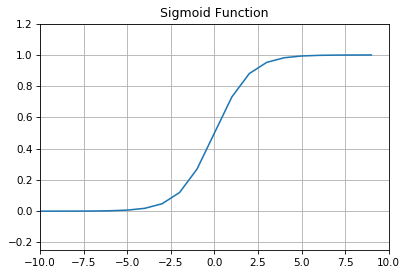

In [31]:
plt.figure(figsize=(6, 4), dpi= 75)
plt.axis([-10,10,-0.25,1.2])
plt.grid()
plt.plot(X,Y)
plt.title('Sigmoid Function')
plt.show()

In [32]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

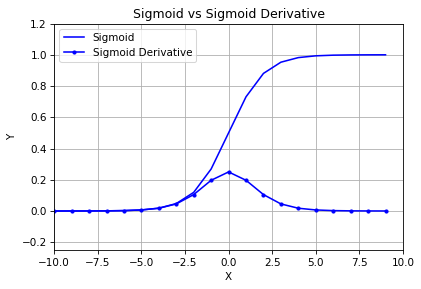

In [33]:
plt.figure(figsize=(6, 4), dpi= 75)
plt.axis([-10,10,-0.25,1.2])
plt.grid()
X = np.arange(-10,10,1)
Y = sigmoid(X)
Y_Prime = sigmoid_derivative(X)
plt.plot(X, Y, label="Sigmoid",c='b')
plt.plot(X, Y_Prime, marker=".", label="Sigmoid Derivative", c='b')
plt.title('Sigmoid vs Sigmoid Derivative')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [34]:
data_array.shape

(29, 3)

In [35]:
for i in range(100):
    random_index = np.random.randint(len(data_array))
    point = data_array[random_index]
    print(i, point)

0 [0.53418393 1.29693375 1.        ]
1 [ 0.23627366 -0.68734378  0.        ]
2 [-0.65745714 -0.4618577   0.        ]
3 [0.8320942  1.34203096 1.        ]
4 [1.13000446 1.34203096 1.        ]
5 [-0.65745714 -0.68734378  0.        ]
6 [ 1.13000446 -0.01088554  1.        ]
7 [-1.25327768 -0.91282987  0.        ]
8 [-0.65745714 -0.68734378  0.        ]
9 [-0.95536741 -0.68734378  0.        ]
10 [0.8320942  1.34203096 1.        ]
11 [-0.95536741 -0.4618577   0.        ]
12 [-0.06163661 -0.01088554  1.        ]
13 [-1.25327768 -0.91282987  0.        ]
14 [ 0.8320942  -0.01088554  1.        ]
15 [-0.65745714 -1.0030243   0.        ]
16 [0.8320942  1.25183653 1.        ]
17 [1.13000446 1.34203096 1.        ]
18 [-0.06163661 -0.01088554  1.        ]
19 [-0.65745714 -0.86773265  0.        ]
20 [2.02373527 1.92829478 1.        ]
21 [ 0.8320942  -0.01088554  1.        ]
22 [2.02373527 1.92829478 1.        ]
23 [-0.95536741 -0.68734378  0.        ]
24 [-0.35954687  0.80086436  1.        ]
25 [-0.95

In [36]:
learning_rate = 0.1

all_costs = []

for i in range(100000):
    # set the random data points that will be used to calculate the summation
    random_number = np.random.randint(len(data_array))
    random_person = data_array[random_number]
    
    # the height and weight from the random individual are selected
    height = random_person[0]
    weight = random_person[1]

    z = w1*height+w2*weight+b
    predictedGender = sigmoid(z)
    
    actualGender = random_person[2]
    
    cost = (predictedGender-actualGender)**2
    
    # the cost value is appended to the list
    all_costs.append(cost)
    
    # partial derivatives of the cost function and summation are calculated
    dcost_predictedGender = 2 * (predictedGender-actualGender)
    dpredictedGenger_dz = sigmoid_derivative(z)
    dz_dw1 = height
    dz_dw2 = weight
    dz_db = 1
    
    dcost_dw1 = dcost_predictedGender * dpredictedGenger_dz * dz_dw1
    dcost_dw2 = dcost_predictedGender * dpredictedGenger_dz * dz_dw2
    dcost_db  = dcost_predictedGender * dpredictedGenger_dz * dz_db
    
    # gradient descent calculation
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b  = b  - learning_rate * dcost_db

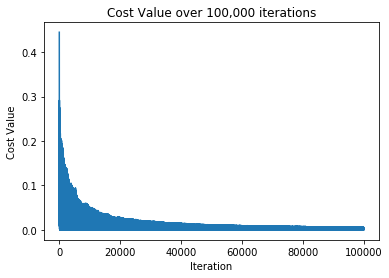

In [37]:
plt.plot(all_costs)
plt.title('Cost Value over 100,000 iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.show()

In [38]:
print('The final values of w1, w2, and b')
print('---------------------------------')
print('w1 = {}'.format(w1))
print('w2 = {}'.format(w2))
print('b  = {}'.format(b))

The final values of w1, w2, and b
---------------------------------
w1 = 1.8209212481467743
w2 = 10.501412686537124
b  = 2.6922206902934818


In [39]:
for i in range(len(data_array)):
    random_individual = data_array[i]
    height = random_individual[0]
    weight = random_individual[1]
    z = height*w1 + weight*w2 + b
    predictedGender=sigmoid(z)
    print("Individual #{} actual score: {} predicted score: {}"
          .format(i+1,random_individual[2],predictedGender))

Individual #1 actual score: 1.0 predicted score: 0.9921049600550155
Individual #2 actual score: 0.0 predicted score: 0.03372805542036423
Individual #3 actual score: 0.0 predicted score: 0.016372819700798374
Individual #4 actual score: 1.0 predicted score: 0.9999862828839244
Individual #5 actual score: 0.0 predicted score: 0.0469456203497416
Individual #6 actual score: 1.0 predicted score: 0.9999999688535043
Individual #7 actual score: 0.0 predicted score: 0.0004915890916453382
Individual #8 actual score: 1.0 predicted score: 0.9999999999972711
Individual #9 actual score: 0.0 predicted score: 1.6712931344961645e-08
Individual #10 actual score: 0.0 predicted score: 0.00010349306890725019
Individual #11 actual score: 1.0 predicted score: 0.9999999709268494
Individual #12 actual score: 1.0 predicted score: 0.9835862381176147
Individual #13 actual score: 1.0 predicted score: 0.999999966632299
Individual #14 actual score: 0.0 predicted score: 0.00011877876719320243
Individual #15 actual scor

In [40]:
def input_normalize(height, weight):
    inputHeight = (height - x_mean[0])/x_std[0]
    inputWeight = (weight - x_mean[1])/x_std[1]
    return inputHeight, inputWeight

In [41]:
score = input_normalize(70, 180)

In [42]:
def predict_gender(raw_score):
    gender_summation = raw_score[0]*w1 + raw_score[1]*w2 + b
    gender_score = sigmoid(gender_summation)
    if gender_score <= 0.5:
        gender = 'Female'
    else:
        gender = 'Male'
    return gender, gender_score

In [43]:
predict_gender(score)

('Male', 0.9999999989437511)

In [44]:
score = input_normalize(50,120)

In [45]:
predict_gender(score)

('Female', 8.392313454170623e-09)

In [46]:
x_min = min(data_array[:,0])-0.1
x_max = max(data_array[:,0])+0.1
y_min = min(data_array[:,1])-0.1
y_max = max(data_array[:,1])+0.1
increment= 0.05
print(x_min, x_max, y_min, y_max)

-2.24700848158745 2.1237352673336227 -1.8245797669033634 2.028294779946051


In [47]:
x_data= np.arange(x_min, x_max, increment)

In [48]:
y_data= np.arange(y_min, y_max, increment)

In [49]:
xy_data = [[x_all, y_all] for x_all in x_data for y_all in y_data]

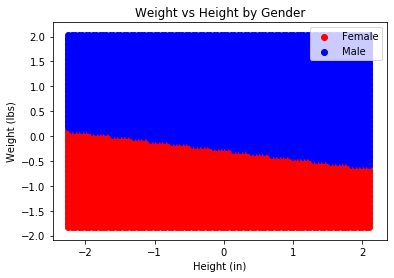

In [50]:
for i in range(len(xy_data)):
    data = (xy_data[i])
    height = data[0]
    weight = data[1]  
    z_new = height*w1 + weight*w2 + b
    predictedGender_new=sigmoid(z_new)
    # print(height, weight, predictedGender_new)
    ax = plt.scatter(height[predictedGender_new<=0.5],
                     weight[predictedGender_new<=0.5], 
                     marker = 'o', c= 'r', label = 'Female')
    bx = plt.scatter(height[predictedGender_new > 0.5],
                     weight[predictedGender_new>0.5], 
                     marker = 'o', c= 'b', label = 'Male')    
    # plot values, title, legend, x and y axis
    plt.title('Weight vs Height by Gender')
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend(handles=[ax,bx])